In [1]:
#| output: false
%matplotlib inline
from input_environment_defs import *

Splikes version  0.1.2
Plasticnet version  0.1.9


In [2]:
def grid(val=True):
    plt.rcParams['axes.grid']=val
    
from Memory import Storage

In [3]:
#| output: false

# Make the original image files
make_original_image_files()



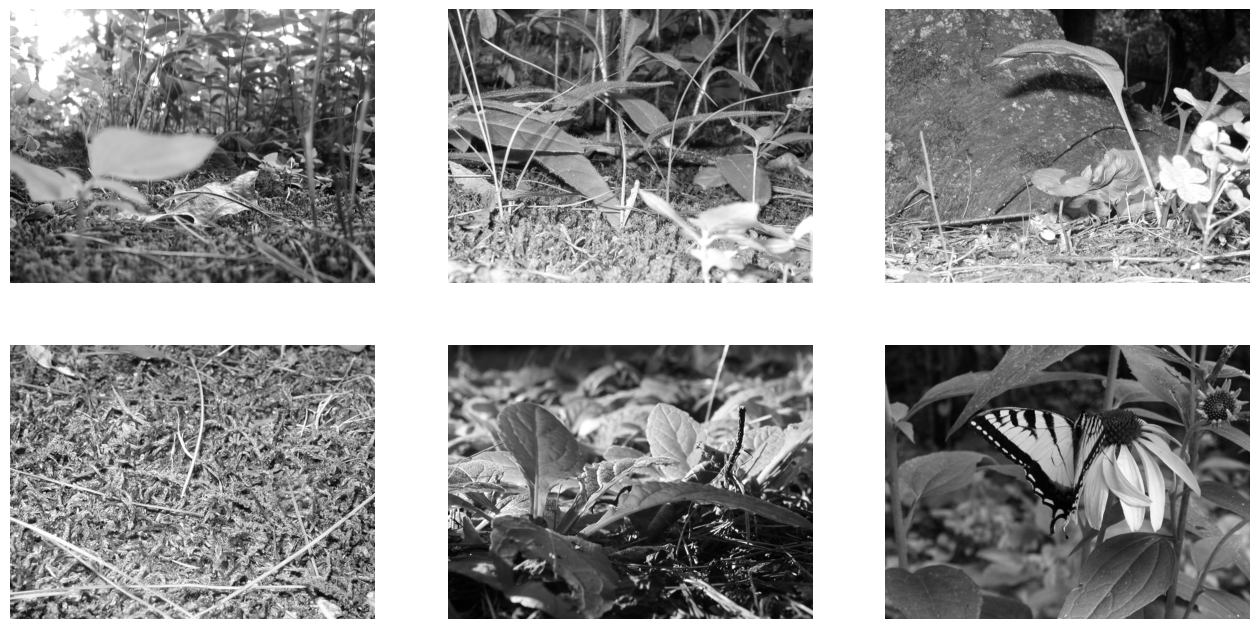

In [4]:
#| label: fig-orig
#| fig-cap: A Small Subset of the Original Natural Images
fname='asdf/bbsk081604_all.asdf'
image_data=pi5.asdf_load_images(fname)
im=[arr.astype(float)*image_data['im_scale_shift'][0]+
        image_data['im_scale_shift'][1] for arr in image_data['im']]
del image_data
plt.figure(figsize=(16,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(im[i],cmap=plt.cm.gray)
    plt.axis('off')
orig_im=im

 [#############################100% (ETA: 0.0 s)#############################]


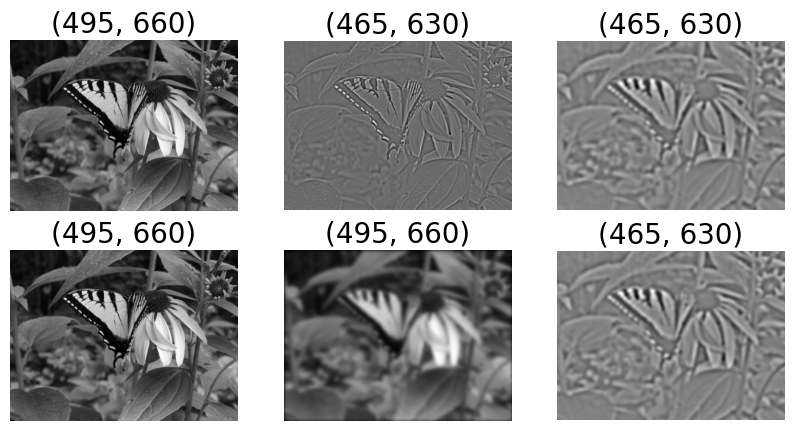

In [5]:
im=orig_im[5]
var={'im':[im],'im_scale_shift':[1.0,0.0]}

figure(figsize=(10,5))

subplot(2,3,1)
imshow(im,cmap=plt.cm.gray)
axis('off')
title(im.shape)

subplot(2,3,2)
var_dog=filters.make_dog(var)

im2=var_dog['im'][0]
imshow(im2,cmap=plt.cm.gray)
axis('off');
title(im2.shape)


subplot(2,3,3)
var_blur=pi5.make_blur(var_dog,5)
im3=var_blur['im'][0]
imshow(im3,cmap=plt.cm.gray)
axis('off');
title(im3.shape)


var_blur1=var_blur



subplot(2,3,4)
imshow(im,cmap=plt.cm.gray)
axis('off')
title(im.shape)

subplot(2,3,5)
var_blur=pi5.make_blur(var,5)
im3=var_blur['im'][0]
imshow(im3,cmap=plt.cm.gray)
axis('off');
title(im3.shape)



subplot(2,3,6)
var_dog=filters.make_dog(var_blur)
im2=var_dog['im'][0]
imshow(im2,cmap=plt.cm.gray)
axis('off');
title(im2.shape)

var_blur2=var_dog


/Users/bblais/tmp/ipykernel_2091/2059735553.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


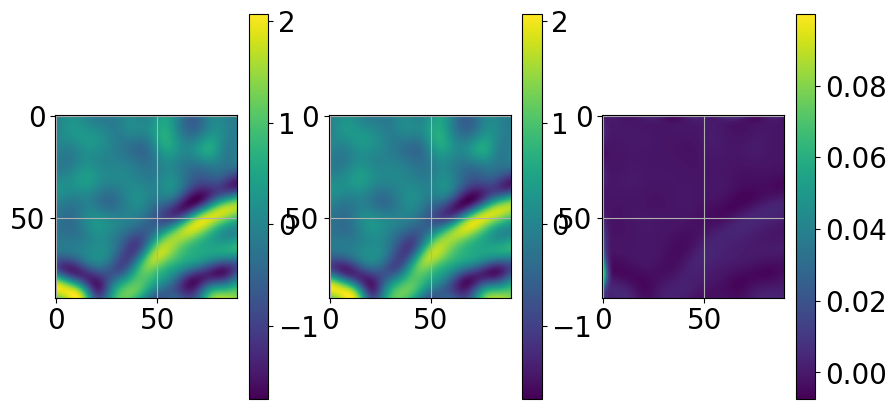

In [7]:
im1=var_blur1['im'][0]
im2=var_blur2['im'][0]

idx=np.s_[10:100,10:100]

figure(figsize=(10,5))
imd=im1-im2

for i,imm in enumerate([im1,im2,imd]):
    subplot(1,3,i+1)
    imshow(imm[idx])
    plt.colorbar()





In [8]:

def dog(sd1,sd2,size):
    import numpy 
    v1=numpy.floor((size-1.0)/2.0)
    v2=size-1-v1
    
    y,x=numpy.mgrid[-v1:v2,-v1:v2]
    
    pi=numpy.pi
    
    # raise divide by zero error if sd1=0 and sd2=0
    
    if sd1>0:
        g=1./(2*pi*sd1*sd1)*numpy.exp(-x**2/2/sd1**2 -y**2/2/sd1**2)
        if sd2>0:
            g=g- 1./(2*pi*sd2*sd2)*numpy.exp(-x**2/2/sd2**2 -y**2/2/sd2**2)
    else:
        g=- 1./(2*pi*sd2*sd2)*numpy.exp(-x**2/2/sd2**2 -y**2/2/sd2**2)
    
    return g

def dog_filter(A,sd1=1,sd2=3,size=None,shape='valid',surround_weight=1):
    import scipy.signal as sig

    if not size:
        size=2.0*numpy.ceil(2.0*max([sd1,sd2]))+1.0
        
    if sd1==0 and sd2==0:
        B=copy.copy(A)
        return B
    
    g=dog(sd1,sd2,size)

    B=sig.convolve2d(A,g,mode=shape)
    
    return B




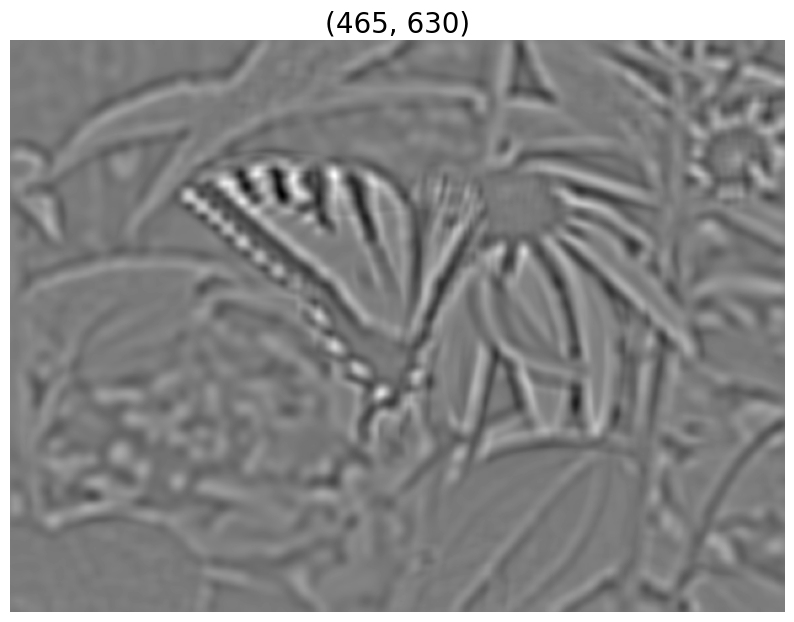

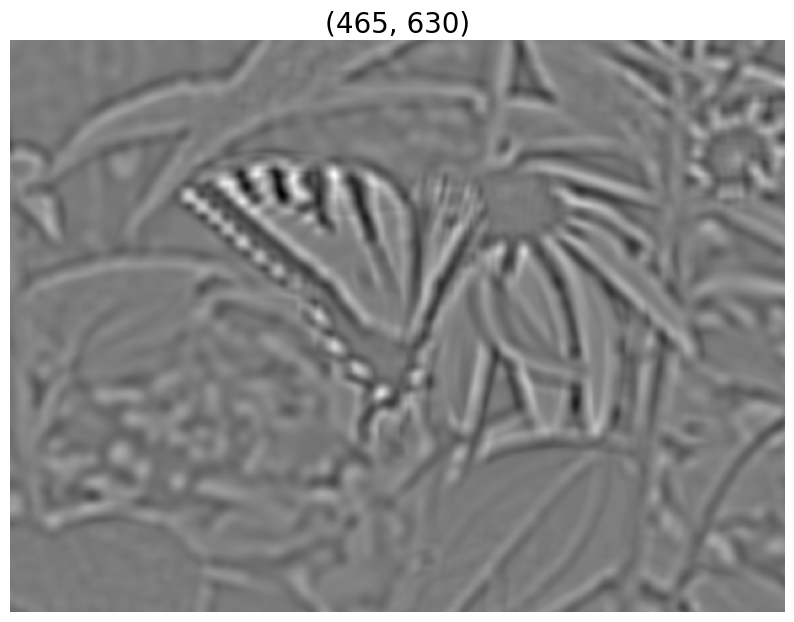

In [9]:
figure()
im2=im
im2=dog_filter(im2,1,3,32,'valid')
im2=dog_filter(im2,5,0,5*3,'same')
imshow(im2,cmap=plt.cm.gray)
axis('off');
title(im2.shape)

im3=im2


figure()
im2=im
im2=dog_filter(im2,5,0,5*3,'same')
im2=dog_filter(im2,1,3,32,'valid')
imshow(im2,cmap=plt.cm.gray)
axis('off');
title(im2.shape)

im4=im2

/Users/bblais/tmp/ipykernel_2091/1730576327.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


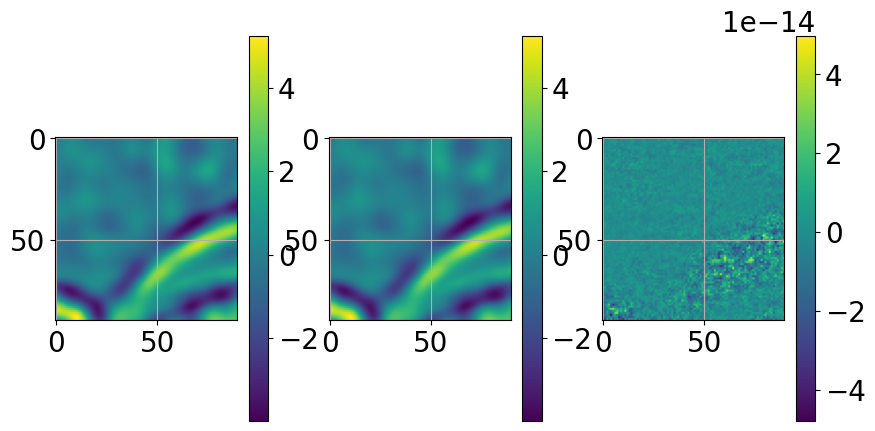

In [10]:
idx=np.s_[10:100,10:100]

figure(figsize=(10,5))
imd=im3-im4
for i,imm in enumerate([im3,im4,imd]):
    subplot(1,3,i+1)
    imshow(imm[idx])
    plt.colorbar()


/Users/bblais/tmp/ipykernel_2091/4202643241.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


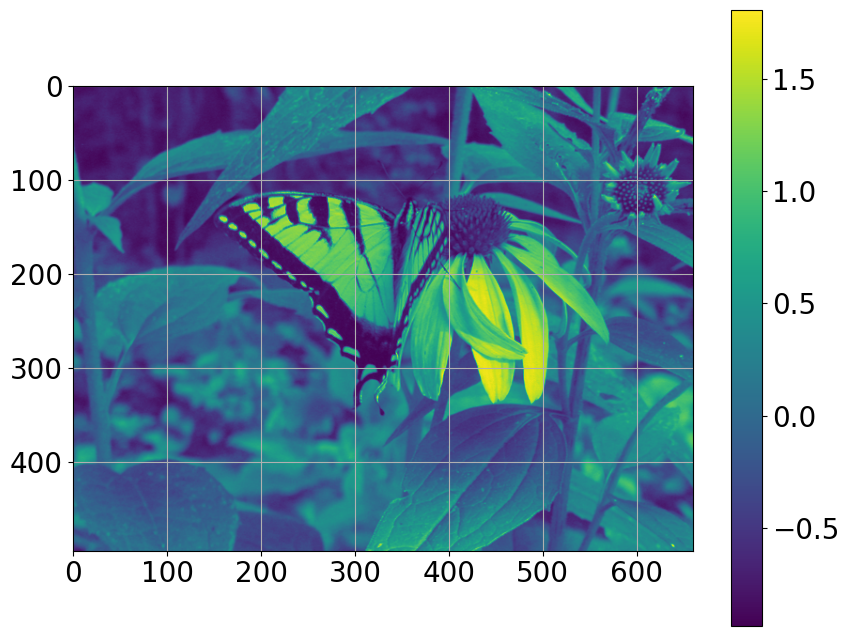

In [11]:
im2=im
x1=im2/im2.mean()-1
imshow(x1)
plt.colorbar()


/Users/bblais/tmp/ipykernel_2091/919082804.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


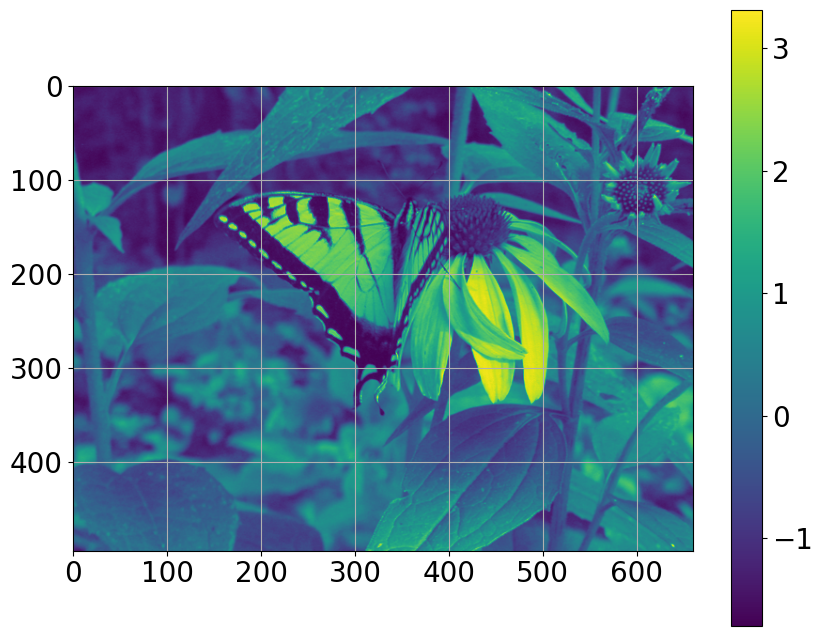

In [12]:
im2=im
x2=(im2-im2.mean())/im2.std()
imshow(x2)
plt.colorbar()


/Users/bblais/tmp/ipykernel_2091/3090617219.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


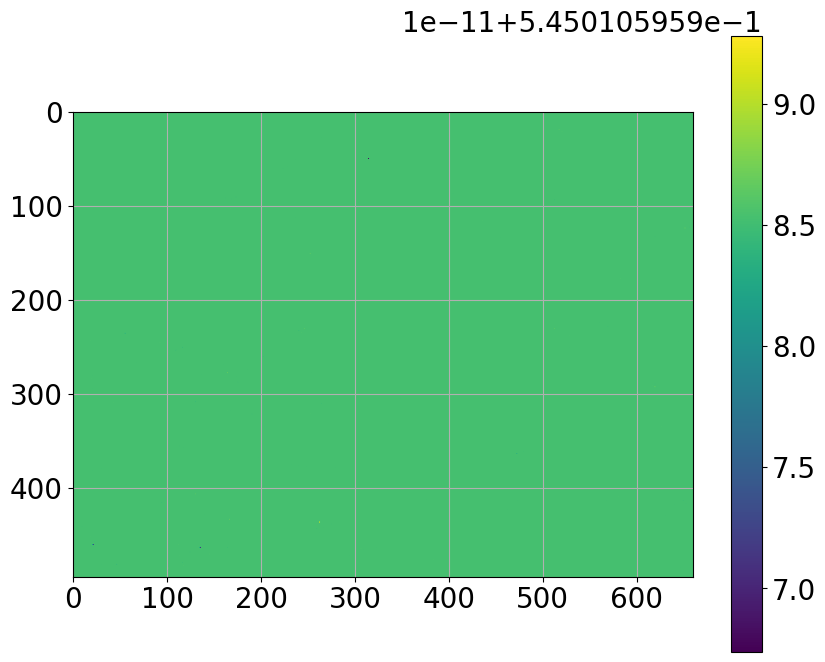

In [13]:
imshow(x1/x2)
plt.colorbar()

In [14]:
x1/x2

array([[0.5450106, 0.5450106, 0.5450106, ..., 0.5450106, 0.5450106,
        0.5450106],
       [0.5450106, 0.5450106, 0.5450106, ..., 0.5450106, 0.5450106,
        0.5450106],
       [0.5450106, 0.5450106, 0.5450106, ..., 0.5450106, 0.5450106,
        0.5450106],
       ...,
       [0.5450106, 0.5450106, 0.5450106, ..., 0.5450106, 0.5450106,
        0.5450106],
       [0.5450106, 0.5450106, 0.5450106, ..., 0.5450106, 0.5450106,
        0.5450106],
       [0.5450106, 0.5450106, 0.5450106, ..., 0.5450106, 0.5450106,
        0.5450106]])

## response of ganglion cells to gratings

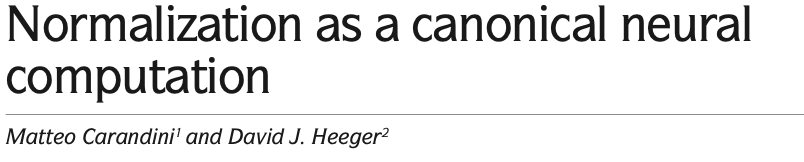

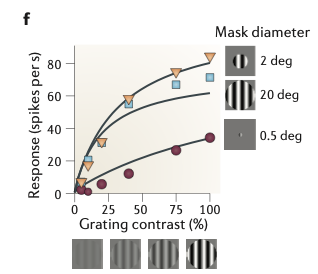

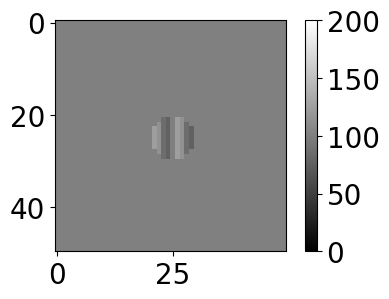

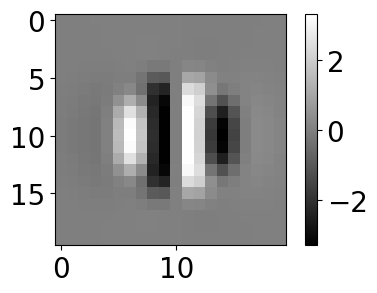

In [15]:
background=100
C=25

λ=5
N=50
R=5
y,x=np.mgrid[:N,:N]


grid(False)
im2=C*np.sin(x/λ*2*np.pi)*((x-N/2)**2+(y-N/2)**2<R**2)+background
figure(figsize=(5,3))
imshow(im2,vmin=0,vmax=200,cmap=plt.cm.gray)
plt.colorbar()

im2=dog_filter(im2,1,3,32,'valid')
im2-=im2.mean()
im2/=im2.std()
figure(figsize=(5,3))
plt.grid(False)
imshow(im2,cmap=plt.cm.gray)
plt.colorbar()



  0%|                                                                        | 0/20 [00:00<?, ?it/s]/Users/bblais/tmp/ipykernel_2091/3875638709.py:17: RuntimeWarning: invalid value encountered in divide
  im2/=im2.std()
100%|██████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 800.06it/s]

100%|██████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 823.96it/s]

100%|██████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 833.61it/s]

100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 31.46it/s]


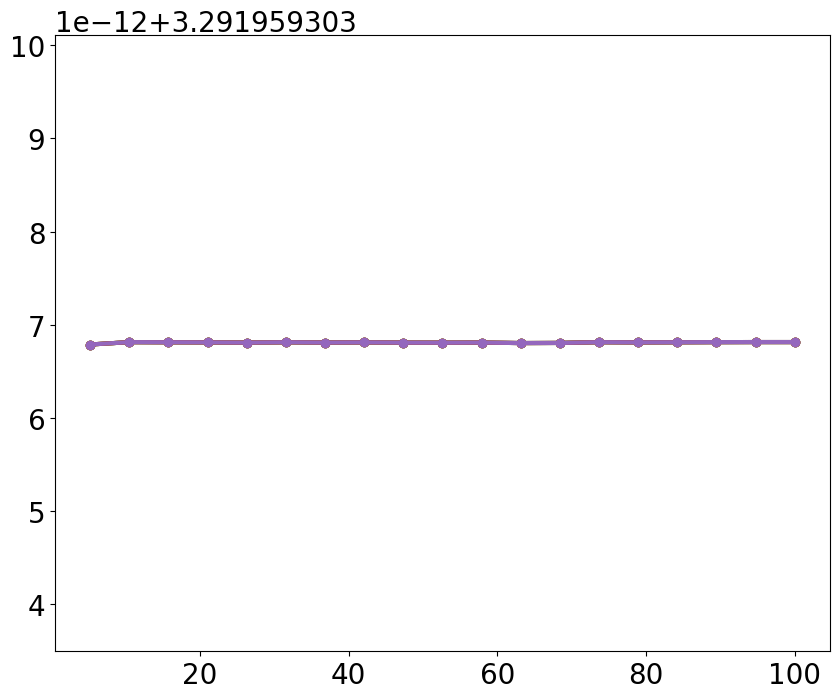

In [16]:
for R in tqdm(np.linspace(1,50,5)):
    S=Storage()
    for C in tqdm(np.linspace(0,100,20)):
        background=100
        #C=25

        λ=5
        N=50
        R=5
        y,x=np.mgrid[:N,:N]


        im2=C*np.sin(x/λ*2*np.pi)*((x-N/2)**2+(y-N/2)**2<R**2)+background

        im2=dog_filter(im2,1,3,32,'valid')
        im2-=im2.mean()
        im2/=im2.std()

        S+=C,im2.max()


    C,resp=S.arrays()

    plot(C,resp,'-o')




In [17]:
R

5

## reproduce the photoreceptor data first

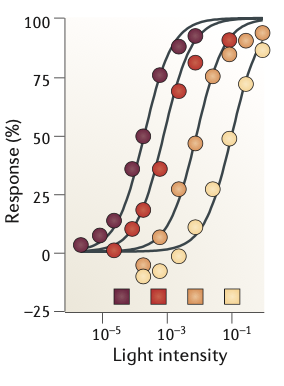


$$
R=\gamma \frac{I^n}{\sigma^n+I_m^n+I^n}
$$

with $n=1$

In [3]:
def RR(I,γ,σ,Im):
    n=1
    return γ*I**n/(σ**n + Im**n + I**n)
    
    

In [4]:
xy_str="""
-5.666666666666666, 3.6414565826330545
-5.0606060606060606, 7.843137254901961
-4.636363636363637, 14.005602240896366
-4.05050505050505, 36.134453781512605
-3.7676767676767673, 50.420168067226896
-3.242424242424242, 76.19047619047619
-2.6363636363636367, 88.51540616246498
-2.1111111111111107, 92.99719887955182
-4.656565656565656, 1.400560224089645
-4.07070707070707, 10.644257703081237
-3.7272727272727266, 18.767507002801125
-3.242424242424242, 36.414565826330545
-2.6363636363636367, 69.74789915966387
-2.1313131313131306, 81.23249299719888
-1.1010101010101012, 90.75630252100841
-3.7474747474747474, -5.3221288515406115
-3.2020202020202024, 7.002801120448183
-2.6565656565656566, 26.890756302521012
-2.1515151515151514, 46.77871148459384
-1.6060606060606064, 75.63025210084034
-1.121212121212122, 85.15406162464987
-0.5555555555555554, 90.75630252100841
-0.07070707070707094, 94.11764705882354
-3.7272727272727266, -9.523809523809504
-3.2020202020202024, -7.282913165266109
-2.6767676767676765, -1.1204481792717047
-2.1313131313131306, 11.20448179271709
-1.5858585858585856, 27.450980392156865
-1.0808080808080813, 48.73949579831933
-0.595959595959596, 71.70868347338936
-0.05050505050505194, 86.5546218487395
"""


In [5]:
x=10**(np.array([[float(__) for __ in _.split(',')] for _ in xy_str.strip().split('\n')])[:,0])
y=np.array([[float(__) for __ in _.split(',')] for _ in xy_str.strip().split('\n')])[:,1]

x=[x[:8],x[8:15],x[15:23],x[23:]]
y=[y[:8],y[8:15],y[15:23],y[23:]]

In [6]:
x

[array([2.15443469e-06, 8.69749003e-06, 2.31012970e-05, 8.90215085e-05,
        1.70735265e-04, 5.72236766e-04, 2.31012970e-03, 7.74263683e-03]),
 array([2.20513074e-05, 8.49753436e-05, 1.87381742e-04, 5.72236766e-04,
        2.31012970e-03, 7.39072203e-03, 7.92482898e-02]),
 array([1.78864953e-04, 6.28029144e-04, 2.20513074e-03, 7.05480231e-03,
        2.47707636e-02, 7.56463328e-02, 2.78255940e-01, 8.49753436e-01]),
 array([1.87381742e-04, 6.28029144e-04, 2.10490414e-03, 7.39072203e-03,
        2.59502421e-02, 8.30217568e-02, 2.53536449e-01, 8.90215085e-01])]

[9.43633803e+01 3.47201770e-19 1.41883009e-04]
[9.12213158e+01 1.32616138e-18 7.83603094e-04]
[9.37169996e+01 5.75735002e-15 6.53600769e-03]
[9.23680971e+01 7.06774222e-16 6.94910191e-02]


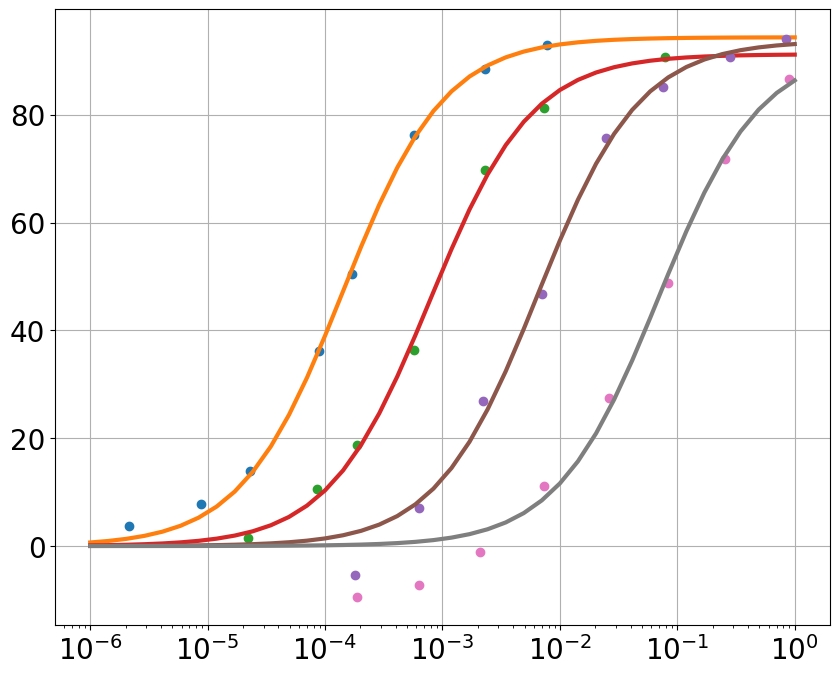

In [7]:
from scipy.optimize import curve_fit

γ_mat,Im_mat=[],[]

for xx,yy in zip(x,y):
    plot(xx,yy,'o')
    popt, pcov = curve_fit(RR, xx, yy,
                                 bounds=([0,0,0], [100, 1e-14, 1]))
    
    γ_mat.append(popt[0])
    Im_mat.append(popt[-1])
    xx=10**(np.linspace(-6,0,40))
    yy=RR(xx,*popt)
    plot(xx,yy)
    print(popt)

    
plt.xscale('log')

[9.43633803e+01 3.47201770e-19 1.41883009e-04]
[9.12213158e+01 1.32616138e-18 7.83603094e-04]
[9.37169996e+01 5.75735002e-15 6.53600769e-03]
[9.23680971e+01 7.06774222e-16 6.94910191e-02]


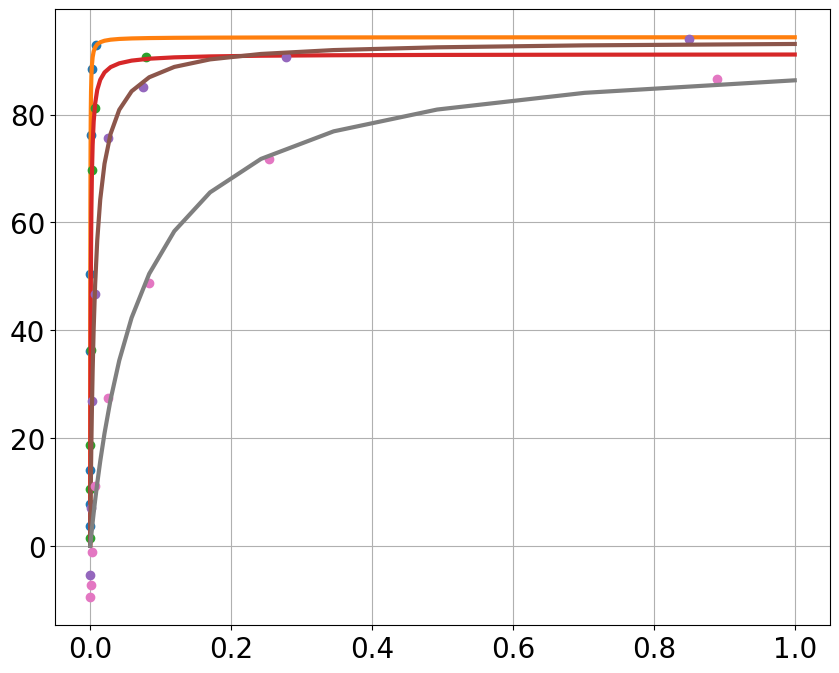

In [24]:
from scipy.optimize import curve_fit

γ_mat,Im_mat=[],[]

for xx,yy in zip(x,y):
    plot(xx,yy,'o')
    popt, pcov = curve_fit(RR, xx, yy,
                                 bounds=([0,0,0], [100, 1e-14, 1]))
    
    γ_mat.append(popt[0])
    Im_mat.append(popt[-1])
    xx=10**(np.linspace(-6,0,40))
    yy=RR(xx,*popt)
    plot(xx,yy)
    print(popt)

    


the linear approximation looks pretty terrible

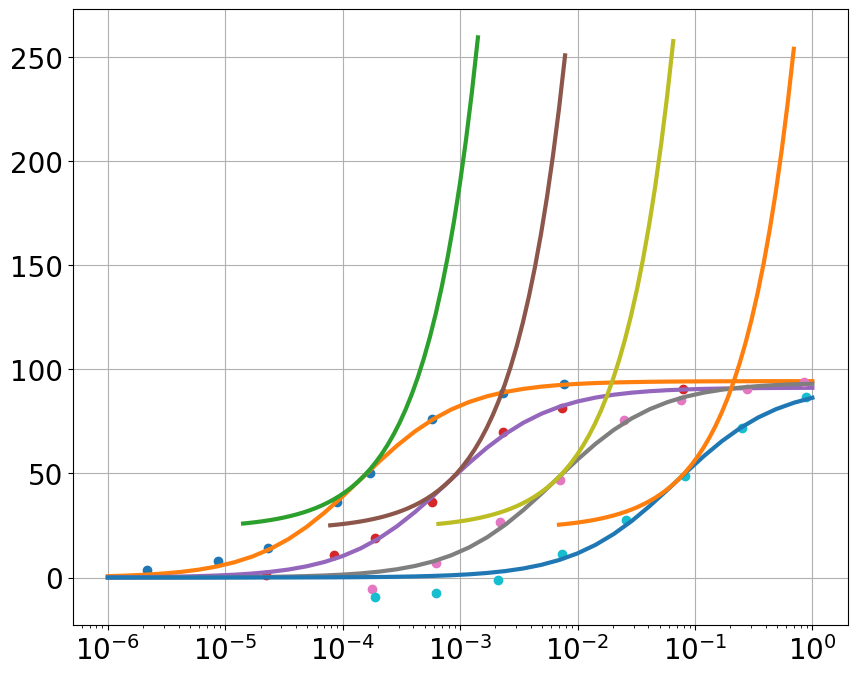

In [8]:
for xx,yy,γ,Im in zip(x,y,γ_mat,Im_mat):
    plot(xx,yy,'o')
    xx=10**(np.linspace(-6,0,40))
    yy=RR(xx,*[γ,0,Im])
    plot(xx,yy)

    p=np.log10(Im)
    xx=10**(np.linspace(p-1,p+1,40))
    C=(xx-Im)/Im
    plot(xx,γ/2+γ/4*C)
    
plt.xscale('log')

how does it compare to normalization?

see notebook 2023-01-30 - Exploring Photoreceptor Responses

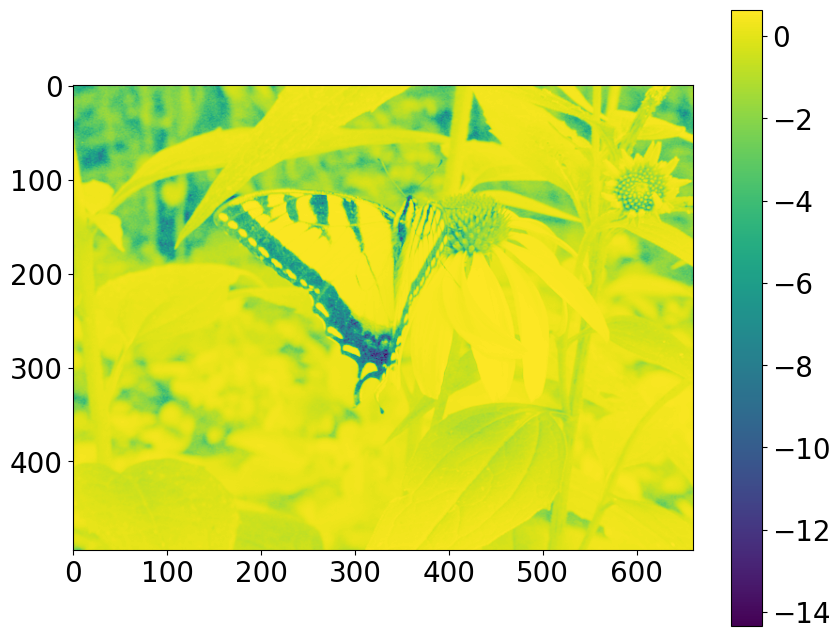

In [39]:
# apply to natural images
im2=im
x2=(im2-im2.mean())/im2
imshow(x2)
plt.colorbar()


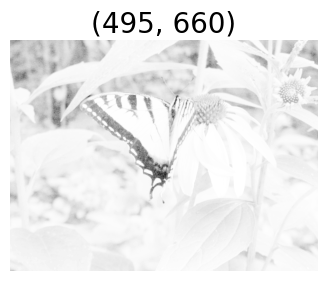

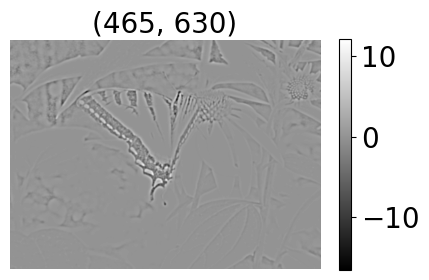

In [51]:
im2=im
im2=(im2-im2.mean())/im2
figure(figsize=(5,3))
imshow(im2,cmap=plt.cm.gray)
axis('off');
title(im2.shape)


im2=dog_filter(im2,1,3,32,'valid')
im2=(im2-im2.mean())/im2.std()


figure(figsize=(5,3))
imshow(im2,cmap=plt.cm.gray)
axis('off');
title(im2.shape)
plt.colorbar()


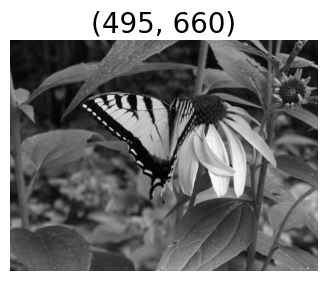

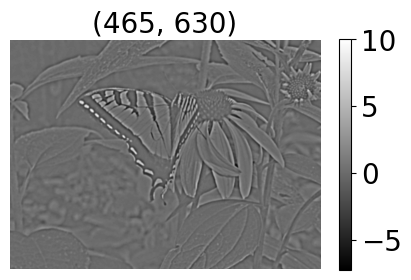

In [52]:
im2=im
#im2=(im2-im2.mean())/im2
figure(figsize=(5,3))
imshow(im2,cmap=plt.cm.gray)
axis('off');
title(im2.shape)


im2=dog_filter(im2,1,3,32,'valid')
im2=(im2-im2.mean())/im2.std()

figure(figsize=(5,3))
imshow(im2,cmap=plt.cm.gray)
axis('off');
title(im2.shape)
plt.colorbar()


/Users/bblais/tmp/ipykernel_2091/2698634870.py:13: RuntimeWarning: invalid value encountered in sqrt
  im2=im2/(10+np.sqrt(im22))


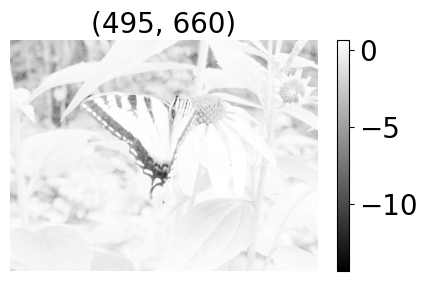

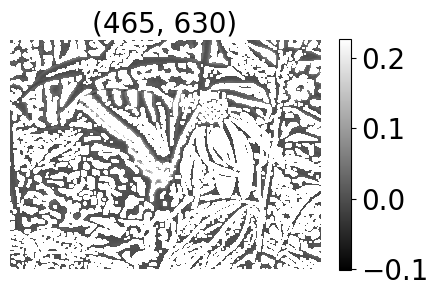

In [59]:
im2=im
im2=(im2-im2.mean())/im2
figure(figsize=(5,3))
imshow(im2,cmap=plt.cm.gray)
axis('off');
title(im2.shape)
plt.colorbar()
im2a=im2

im2=dog_filter(im2a,1,3,32,'valid')
im22=dog_filter(im2a**2,4,1,32,'valid')

im2=im2/(10+np.sqrt(im22))

figure(figsize=(5,3))
imshow(im2,cmap=plt.cm.gray)
axis('off');
title(im2.shape)
plt.colorbar()


photoreceptor subtract mean across a smallish area rather than the entire image

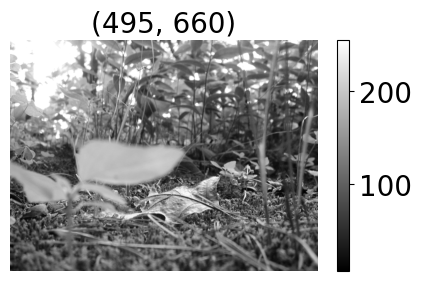

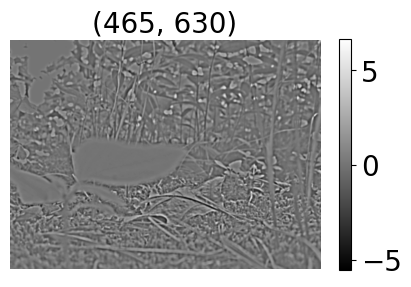

In [83]:
im=orig_im[0]
import scipy.signal as sig
im2=im

if True: # local average

    N=33
    im2_average=sig.convolve2d(im2,np.ones((N,N))/N**2,mode='valid')
    ra,ca=im2_average.shape
    r,c=im2.shape
    im2=im2[N//2:N//2+ra,N//2:N//2+ca]

    im2=(im2-im2_average)/im2
    
else:
    
    im2=(im2-im2.mean())/im2

im2=im
    
figure(figsize=(5,3))
imshow(im2,cmap=plt.cm.gray)
axis('off');
title(im2.shape)
plt.colorbar()


im2a=im2

im2=dog_filter(im2a,1,3,32,'valid')
im2=(im2-im2.mean())/im2.std()


figure(figsize=(5,3))
imshow(im2,cmap=plt.cm.gray)
axis('off');
title(im2.shape)
plt.colorbar()

In [77]:
im2.max()

9.047925171330856

In [70]:
N//2

16

Why is the convolution with the normalized image different than the normalized convolution of the original image?

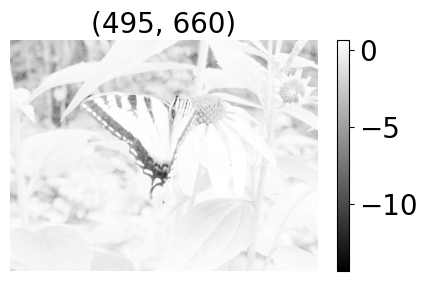

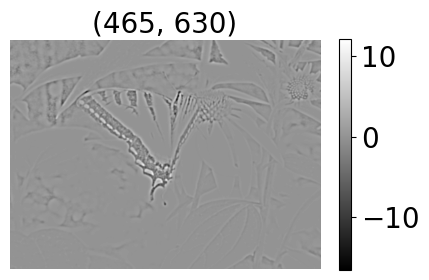

In [85]:
im=orig_im[5]
im2=im

im2=(im2-im2.mean())/im2
figure(figsize=(5,3))
imshow(im2,cmap=plt.cm.gray)
axis('off');
title(im2.shape)
plt.colorbar()


im2a=im2

im2=dog_filter(im2a,1,3,32,'valid')
im2=(im2-im2.mean())/im2.std()


figure(figsize=(5,3))
imshow(im2,cmap=plt.cm.gray)
axis('off');
title(im2.shape)
plt.colorbar()

convolution scales no problem

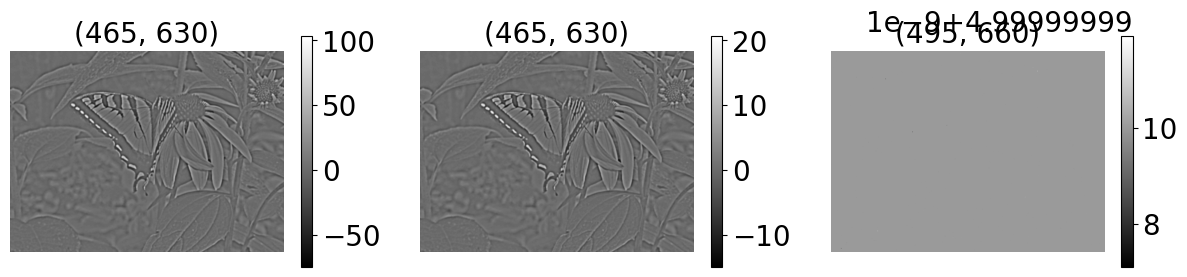

In [87]:
im2=im

im2a=dog_filter(im2,1,3,32,'valid')
im2=im2/5
im2b=dog_filter(im2,1,3,32,'valid')


figure(figsize=(15,3))
subplot(1,3,1)
imshow(im2a,cmap=plt.cm.gray)
axis('off');
title(im2a.shape)
plt.colorbar()

subplot(1,3,2)
imshow(im2b,cmap=plt.cm.gray)
axis('off');
title(im2b.shape)
plt.colorbar()


im2d=im2a/im2b
subplot(1,3,3)
imshow(im2d,cmap=plt.cm.gray)
axis('off');
title(im2.shape)
plt.colorbar()


convolution of DOG with a constant is zero

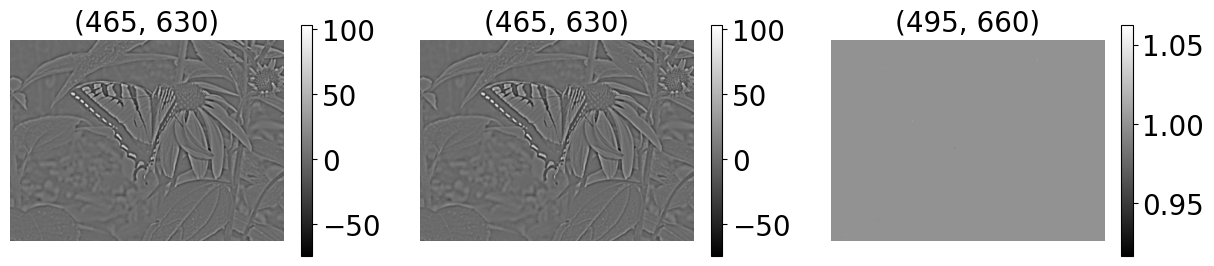

In [91]:
im2=im

im2a=dog_filter(im2,1,3,32,'valid')
im2=im2+5
im2b=dog_filter(im2,1,3,32,'valid')


figure(figsize=(15,3))
subplot(1,3,1)
imshow(im2a,cmap=plt.cm.gray)
axis('off');
title(im2a.shape)
plt.colorbar()

subplot(1,3,2)
imshow(im2b,cmap=plt.cm.gray)
axis('off');
title(im2b.shape)
plt.colorbar()


im2d=im2a/im2b
subplot(1,3,3)
imshow(im2d,cmap=plt.cm.gray)
axis('off');
title(im2.shape)
plt.colorbar()


In [93]:
im2d.ravel()[:20]

array([0.99999615, 0.99999752, 0.99999845, 0.99999855, 0.9999974 ,
       0.99998246, 1.00000444, 1.00000195, 1.00000157, 1.00000146,
       1.00000127, 1.00000134, 1.00000163, 1.00000176, 1.0000019 ,
       1.00000326, 0.99996911, 0.99999483, 0.99998893, 0.99998589])

90.89428914416898 49.53835069812382


array([49.5418169 , 49.54058227, 49.53974617, 49.53965706, 49.54069079,
       49.55415239, 49.53435519, 49.53659101, 49.53693623, 49.53703921,
       49.53721077, 49.53714593, 49.53688642, 49.53676973, 49.53663968,
       49.53541606, 49.56618822, 49.54300311, 49.54832495, 49.55106177])

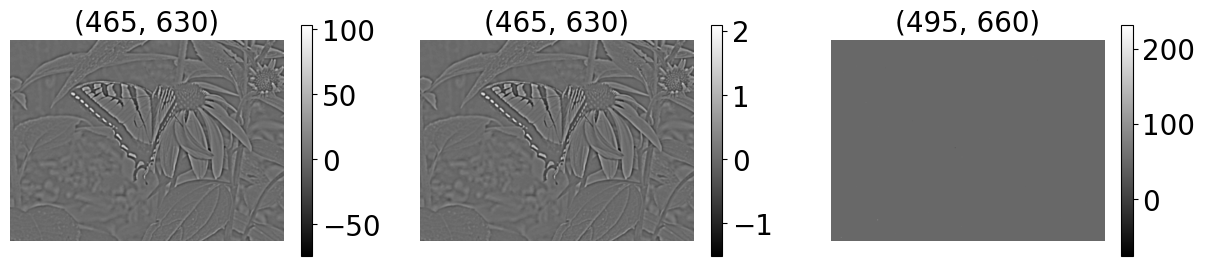

In [98]:
im2=im

mn=im2.mean()
sd=im2.std()
print(mn,sd)

im2a=dog_filter(im2,1,3,32,'valid')
im2=(im2-mn)/sd
im2b=dog_filter(im2,1,3,32,'valid')


figure(figsize=(15,3))
subplot(1,3,1)
imshow(im2a,cmap=plt.cm.gray)
axis('off');
title(im2a.shape)
plt.colorbar()

subplot(1,3,2)
imshow(im2b,cmap=plt.cm.gray)
axis('off');
title(im2b.shape)
plt.colorbar()


im2d=im2a/im2b
subplot(1,3,3)
imshow(im2d,cmap=plt.cm.gray)
axis('off');
title(im2.shape)
plt.colorbar()

im2d.ravel()[:20]

90.89428914416898


array([-0.00771926, -0.01151907, -0.01783347, -0.01895952, -0.01100606,
       -0.00226559,  0.00580447,  0.01437594,  0.01835118,  0.02010699,
        0.02330908,  0.02185672,  0.01761081,  0.01600223,  0.01453009,
        0.00816931, -0.00132628, -0.00580453, -0.00305778, -0.00258704])

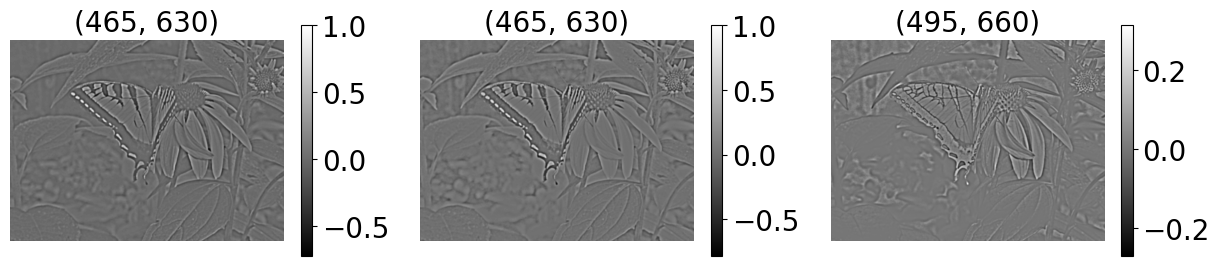

In [125]:
im2=im

mn=im2.mean()
print(mn)

im2a=dog_filter(im2,1,3,32,'valid')
im2a/=im2a.max()

im2=im2/(mn+im2)
im2b=dog_filter(im2,1,3,32,'valid')
im2b/=im2b.max()


figure(figsize=(15,3))
subplot(1,3,1)
imshow(im2a,cmap=plt.cm.gray)
axis('off');
title(im2a.shape)
plt.colorbar()

subplot(1,3,2)
imshow(im2b,cmap=plt.cm.gray)
axis('off');
title(im2b.shape)
plt.colorbar()


im2d=(im2a-im2b)
subplot(1,3,3)
imshow(im2d,cmap=plt.cm.gray)
axis('off');
title(im2.shape)
plt.colorbar()

im2d.ravel()[:20]

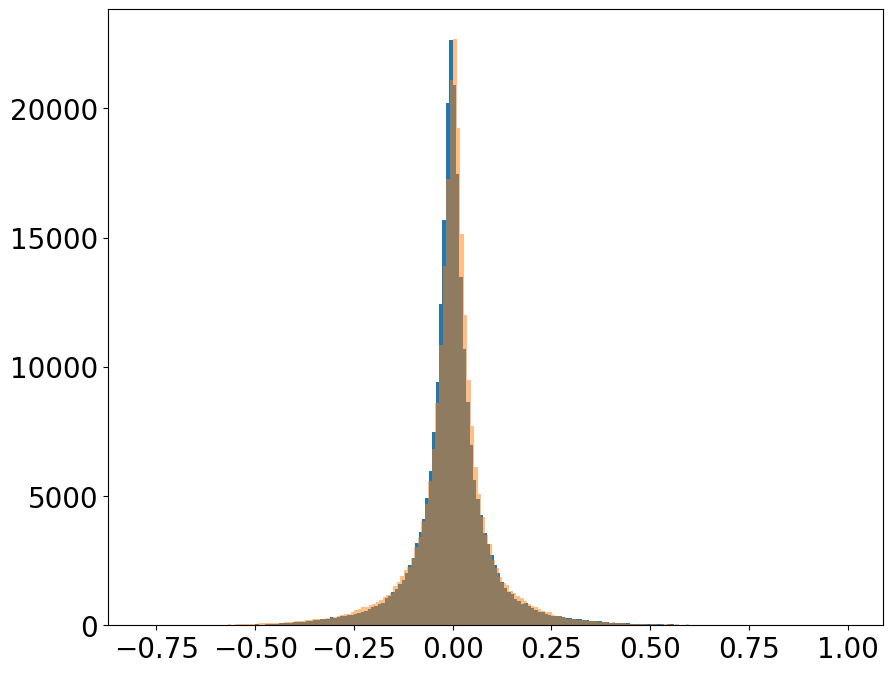

In [124]:
plt.hist(im2a.ravel(),200);
plt.hist(im2b.ravel(),200,alpha=0.5);

try the average and the std over a large window, not the entire imagescipy.ndimage.generic_filter. 

hardly any difference

In [128]:
from scipy.ndimage import generic_filter

In [140]:
def mean(x):
    return x.mean()

def std(x):
    return x.std()

array([-0.37491717, -0.54476693, -0.81491283, -0.84337079, -0.47713336,
       -0.08746642,  0.26921085,  0.64893152,  0.83006152,  0.90956748,
        1.0448923 ,  0.97705599,  0.79197736,  0.73171037,  0.67395697,
        0.37038223, -0.09495353, -0.32326124, -0.19964913, -0.19421459])

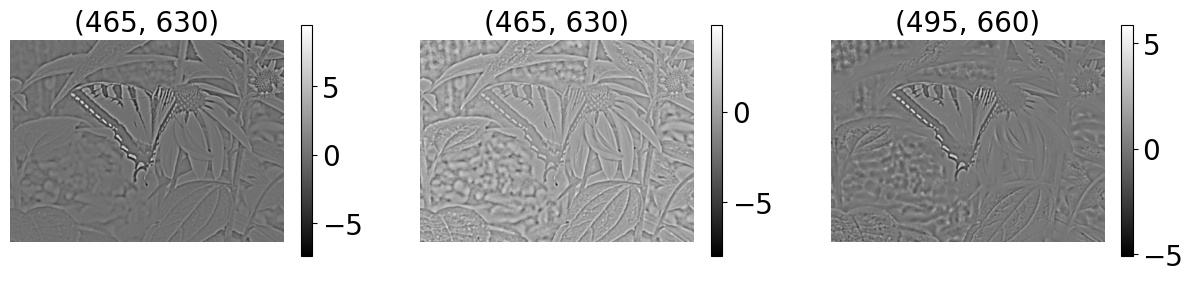

In [146]:
im2=im
N=33

im2=im2/(im2.mean()+im2)
im2a=dog_filter(im2,1,3,32,'valid')
im2a=im2a-im2a.mean()
im2a=im2a/im2a.std()

im2=im
Im=generic_filter(im2,mean,(N,N))
im2=im2/(Im+im2)
im2b=dog_filter(im2,1,3,32,'valid')
im2b=im2b/generic_filter(im2b,std,(N,N))
im2b=im2b-im2b.mean()

# im2b=im2b/im2b.std()


figure(figsize=(15,3))
subplot(1,3,1)
imshow(im2a,cmap=plt.cm.gray)
axis('off');
title(im2a.shape)
plt.colorbar()

subplot(1,3,2)
imshow(im2b,cmap=plt.cm.gray)
axis('off');
title(im2b.shape)
plt.colorbar()


im2d=(im2a-im2b)
subplot(1,3,3)
imshow(im2d,cmap=plt.cm.gray)
axis('off');
title(im2.shape)
plt.colorbar()

im2d.ravel()[:20]

array([-0.06506575, -0.09012526, -0.1274675 , -0.12955232, -0.07545977,
       -0.01592529,  0.04309405,  0.10880216,  0.14235046,  0.15948086,
        0.18443737,  0.16708413,  0.1253801 ,  0.10468403,  0.08821385,
        0.04160022, -0.0229145 , -0.05414775, -0.0391216 , -0.03965234])

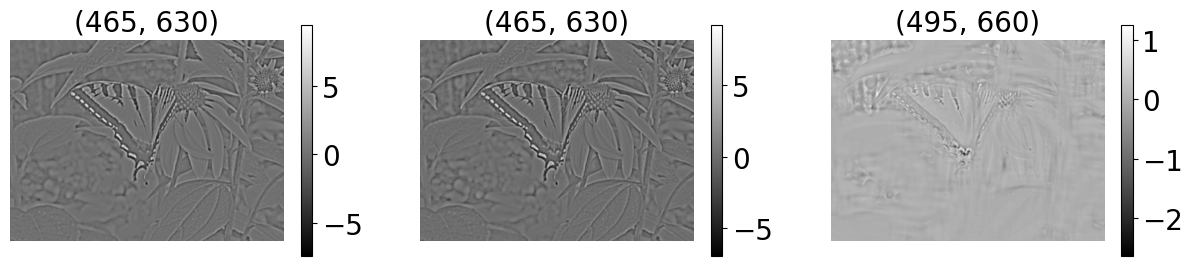

In [156]:
im2=im

im2=im2/(im2.mean()+im2)
im2a=dog_filter(im2,1,3,32,'valid')
im2a=im2a-im2a.mean()
im2a=im2a/im2a.std()

im2=im
N=33
Im=generic_filter(im2,mean,(N,N))
im2=im2/(Im+im2)
im2b=dog_filter(im2,1,3,32,'valid')
im2b=im2b/(1+generic_filter(im2b,std,(N,N)))
im2b=im2b-im2b.mean()
im2b=im2b/im2b.std()  # replace the γ


# im2b=im2b/im2b.std()


figure(figsize=(15,3))
subplot(1,3,1)
imshow(im2a,cmap=plt.cm.gray)
axis('off');
title(im2a.shape)
plt.colorbar()

subplot(1,3,2)
imshow(im2b,cmap=plt.cm.gray)
axis('off');
title(im2b.shape)
plt.colorbar()


im2d=(im2a-im2b)
subplot(1,3,3)
imshow(im2d,cmap=plt.cm.gray)
axis('off');
title(im2.shape)
plt.colorbar()

im2d.ravel()[:20]

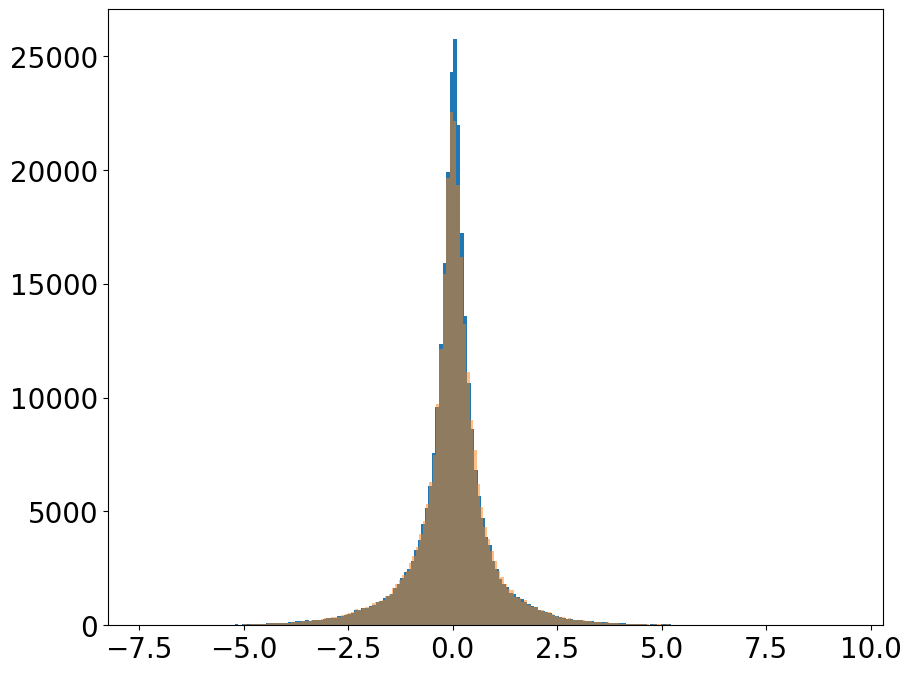

In [153]:
plt.hist(im2a.ravel(),200);
plt.hist(im2b.ravel(),200,alpha=0.5);

In [151]:
im2b.std()

0.029674969305349658

## blur and order

approximate form with global mean and std

array([-0.51354697, -0.55408498, -0.57710128, -0.5826215 , -0.57063989,
       -0.54175427, -0.49792826, -0.44301807, -0.3826887 , -0.3235341 ,
       -0.27158772, -0.23074835, -0.20163591, -0.18124943, -0.16362685,
       -0.1413366 , -0.10740754, -0.05730995,  0.00947036,  0.08862778])

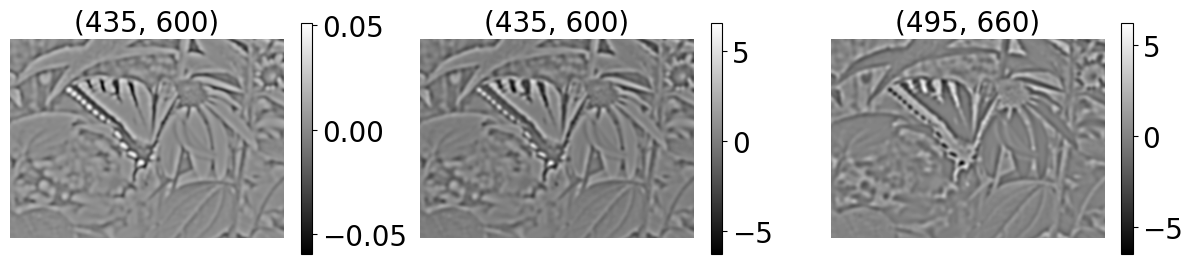

In [165]:
im2=im
im2=dog_filter(im2,4,0,32,'valid')

im2=im2/(im2.mean()+im2)
im2a=dog_filter(im2,1,3,32,'valid')
im2a=im2a-im2a.mean()
im2a=im2a/im2a.std()

im2=im

im2=im2/(im2.mean()+im2)
im2b=dog_filter(im2,1,3,32,'valid')
im2b=im2b-im2b.mean()
im2b=im2b/im2b.std()

im2b=dog_filter(im2b,4,0,32,'valid')
im2b=im2b-im2b.mean()
im2b=im2b/im2b.std()



# im2b=im2b/im2b.std()


figure(figsize=(15,3))
subplot(1,3,1)
imshow(im2a,cmap=plt.cm.gray)
axis('off');
title(im2a.shape)
plt.colorbar()

subplot(1,3,2)
imshow(im2b,cmap=plt.cm.gray)
axis('off');
title(im2b.shape)
plt.colorbar()


im2d=(im2a-im2b)
subplot(1,3,3)
imshow(im2d,cmap=plt.cm.gray)
axis('off');
title(im2.shape)
plt.colorbar()

im2d.ravel()[:20]

array([-0.12974555, -0.12609211, -0.12091975, -0.1150164 , -0.10883464,
       -0.10253999, -0.09605142, -0.08922206, -0.08206097, -0.07487087,
       -0.06821748, -0.06272891, -0.05878728, -0.05623226, -0.05422598,
       -0.05135293, -0.04595759, -0.03670739, -0.02328569, -0.00706276])

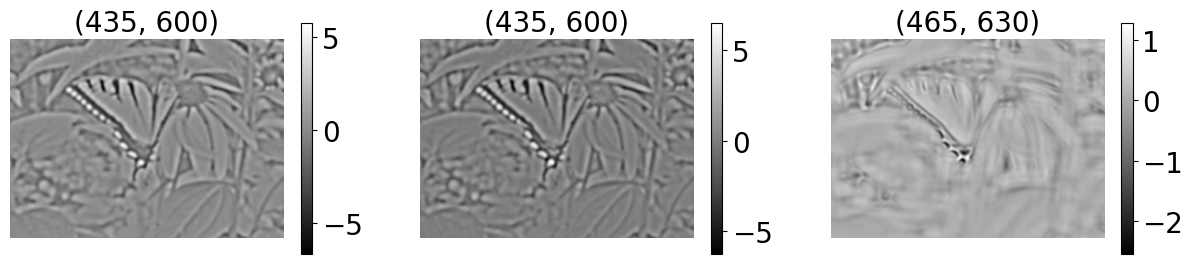

In [157]:
im2=im
im2=dog_filter(im2,4,0,32,'valid')

im2=im2/(im2.mean()+im2)
im2a=dog_filter(im2,1,3,32,'valid')
im2a=im2a-im2a.mean()
im2a=im2a/im2a.std()

im2=im
im2=dog_filter(im,4,0,32,'valid')

N=33
Im=generic_filter(im2,mean,(N,N))
im2=im2/(Im+im2)
im2b=dog_filter(im2,1,3,32,'valid')
im2b=im2b/(1+generic_filter(im2b,std,(N,N)))
im2b=im2b-im2b.mean()
im2b=im2b/im2b.std()  # replace the γ


# im2b=im2b/im2b.std()


figure(figsize=(15,3))
subplot(1,3,1)
imshow(im2a,cmap=plt.cm.gray)
axis('off');
title(im2a.shape)
plt.colorbar()

subplot(1,3,2)
imshow(im2b,cmap=plt.cm.gray)
axis('off');
title(im2b.shape)
plt.colorbar()


im2d=(im2a-im2b)
subplot(1,3,3)
imshow(im2d,cmap=plt.cm.gray)
axis('off');
title(im2.shape)
plt.colorbar()

im2d.ravel()[:20]

array([-0.16214749, -0.17220737, -0.1757852 , -0.17393781, -0.16742411,
       -0.15685528, -0.14293777, -0.12670224, -0.1095883 , -0.09328195,
       -0.07933144, -0.06871123, -0.06148766, -0.0567053 , -0.05259145,
       -0.04704397, -0.03827961, -0.02551825, -0.0095207 ,  0.00718786])

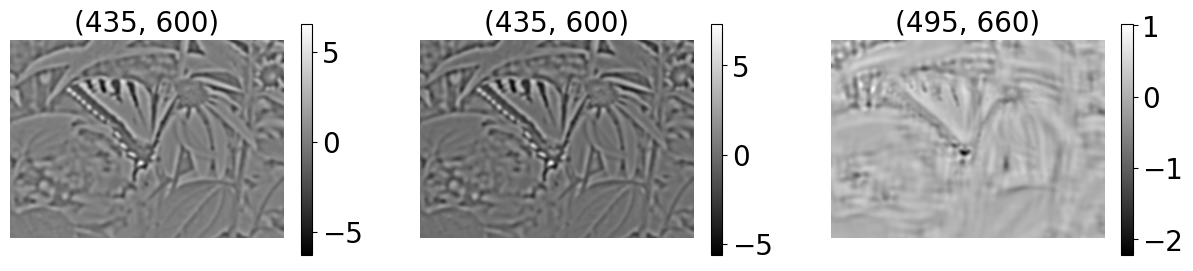

In [160]:
im2=im

im2=im2/(im2.mean()+im2)
im2a=dog_filter(im2,1,3,32,'valid')
im2a=dog_filter(im2a,4,0,32,'valid')
im2a=im2a-im2a.mean()
im2a=im2a/im2a.std()

im2=im

N=33
Im=generic_filter(im2,mean,(N,N))
im2=im2/(Im+im2)
im2b=dog_filter(im2,1,3,32,'valid')
im2b=im2b/(1+generic_filter(im2b,std,(N,N)))

im2b=dog_filter(im2b,4,0,32,'valid')

im2b=im2b-im2b.mean()
im2b=im2b/im2b.std()  # replace the γ


# im2b=im2b/im2b.std()


figure(figsize=(15,3))
subplot(1,3,1)
imshow(im2a,cmap=plt.cm.gray)
axis('off');
title(im2a.shape)
plt.colorbar()

subplot(1,3,2)
imshow(im2b,cmap=plt.cm.gray)
axis('off');
title(im2b.shape)
plt.colorbar()


im2d=(im2a-im2b)
subplot(1,3,3)
imshow(im2d,cmap=plt.cm.gray)
axis('off');
title(im2.shape)
plt.colorbar()

im2d.ravel()[:20]

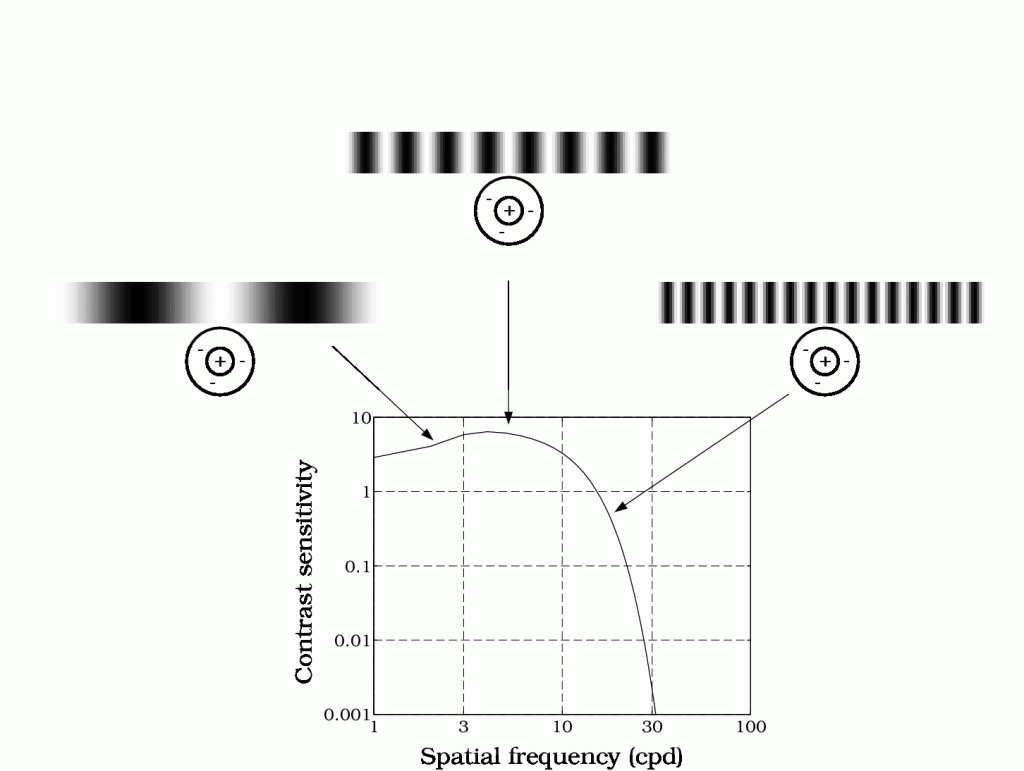

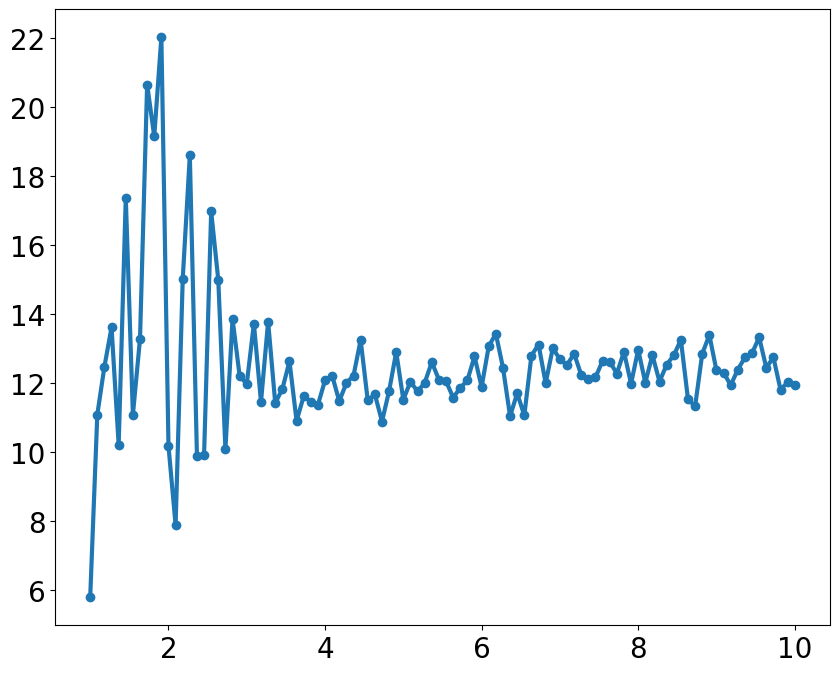

In [33]:
R=100
S=Storage()
for λ in np.linspace(1,10,100):
    background=100
    C=50

    #λ=5
    N=100
    R=5
    y,x=np.mgrid[:N,:N]


    im2=C*np.sin(x/λ*2*np.pi)*((x-N/2)**2+(y-N/2)**2<R**2)+background

    im2=dog_filter(im2,1,3,32,'valid')
    im2-=im2.mean()
    im2/=im2.std()

    S+=λ,im2.max()


λ,resp=S.arrays()

plot(λ,resp,'-o')


In [ ]:
curve_fit?